# 🏆 Práctica de Modelos de Boosting en Machine Learning
En este notebook practicaremos con los principales modelos de boosting: **Boosting clásico, AdaBoost, Gradient Boosting, XGBoost y LightGBM**. Usaremos tres datasets clásicos: California Housing (regresión), Diabetes (clasificación) y Titanic (clasificación).
Al final, compararemos los resultados y discutiremos cuándo es mejor usar cada uno de estos modelos.

## 1. Importar librerías necesarias
Importamos las librerías de manipulación de datos, modelos de boosting y visualización.

In [1]:
# Manipulación y visualización de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de boosting y métricas
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb

# Configuración de gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

---

# 1️⃣ California Housing: Regresión con Boosting
En esta sección aplicaremos todos los modelos de boosting al dataset California Housing.

In [2]:
# --- Preparar datos California Housing ---
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
X_cal = pd.DataFrame(california.data, columns=california.feature_names)
y_cal = california.target
X_cal_train, X_cal_test, y_cal_train, y_cal_test = train_test_split(X_cal, y_cal, test_size=0.2, random_state=42)

### AdaBoost Regressor

In [3]:
ada_cal = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_cal.fit(X_cal_train, y_cal_train)
y_cal_pred_ada = ada_cal.predict(X_cal_test)
mse_cal_ada = mean_squared_error(y_cal_test, y_cal_pred_ada)
r2_cal_ada = r2_score(y_cal_test, y_cal_pred_ada)
print(f'AdaBoost - MSE: {mse_cal_ada:.2f}, R²: {r2_cal_ada:.2f}')

AdaBoost - MSE: 0.61, R²: 0.53


### Gradient Boosting Regressor

In [4]:
gbr_cal = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_cal.fit(X_cal_train, y_cal_train)
y_cal_pred = gbr_cal.predict(X_cal_test)
mse_cal = mean_squared_error(y_cal_test, y_cal_pred)
r2_cal = r2_score(y_cal_test, y_cal_pred)
print(f'Gradient Boosting - MSE: {mse_cal:.2f}, R²: {r2_cal:.2f}')

Gradient Boosting - MSE: 0.29, R²: 0.78


### XGBoost Regressor

In [5]:
xgb_cal = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_cal.fit(X_cal_train, y_cal_train)
y_cal_pred_xgb = xgb_cal.predict(X_cal_test)
mse_cal_xgb = mean_squared_error(y_cal_test, y_cal_pred_xgb)
r2_cal_xgb = r2_score(y_cal_test, y_cal_pred_xgb)
print(f'XGBoost - MSE: {mse_cal_xgb:.2f}, R²: {r2_cal_xgb:.2f}')

XGBoost - MSE: 0.22, R²: 0.83


### LightGBM Regressor

In [6]:
lgbm_cal = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgbm_cal.fit(X_cal_train, y_cal_train)
y_cal_pred_lgbm = lgbm_cal.predict(X_cal_test)
mse_cal_lgbm = mean_squared_error(y_cal_test, y_cal_pred_lgbm)
r2_cal_lgbm = r2_score(y_cal_test, y_cal_pred_lgbm)
print(f'LightGBM - MSE: {mse_cal_lgbm:.2f}, R²: {r2_cal_lgbm:.2f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
LightGBM - MSE: 0.21, R²: 0.84


,Modelo,MSE,RMSE,R2
0,AdaBoost,0.614478,0.783887,0.531079
1,GradientBoosting,0.293997,0.542215,0.775645
2,XGBoost,0.222590,0.471794,0.830137
3,LightGBM,0.214848,0.463517,0.836045


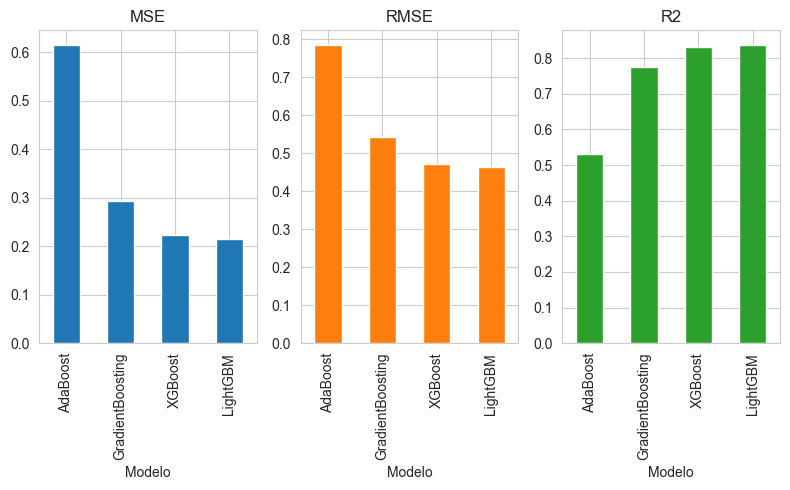

In [8]:
# --- Comparativa California Housing (Regresión) ---
rmse_cal_ada = mse_cal_ada ** 0.5
rmse_cal = mse_cal ** 0.5
rmse_cal_xgb = mse_cal_xgb ** 0.5
rmse_cal_lgbm = mse_cal_lgbm ** 0.5
resultados_cal = pd.DataFrame({
    'Modelo': ['AdaBoost', 'GradientBoosting', 'XGBoost', 'LightGBM'],
    'MSE': [mse_cal_ada, mse_cal, mse_cal_xgb, mse_cal_lgbm],
    'RMSE': [rmse_cal_ada, rmse_cal, rmse_cal_xgb, rmse_cal_lgbm],
    'R2': [r2_cal_ada, r2_cal, r2_cal_xgb, r2_cal_lgbm]
})
display(resultados_cal)
resultados_cal.plot(x='Modelo', y=['MSE', 'RMSE', 'R2'], kind='bar', subplots=True, layout=(1,3), legend=False, title=['MSE','RMSE','R2'])
plt.tight_layout()
plt.show()

- **MSE (Error Medio Cuadrático):** Cuanto más bajo, mejor. Indica el error promedio al predecir el precio de la vivienda.
- **RMSE (Raíz del Error Medio Cuadrático):** Es la raíz cuadrada del MSE, se interpreta en las mismas unidades que la variable objetivo (precio de la vivienda). Cuanto más bajo, mejor.
- **R2 (Coeficiente de determinación):** Cuanto más cerca de 1, mejor. Indica el porcentaje de variabilidad del precio explicado por el modelo.

**Interpretación:**

- **AdaBoost** tiene el peor desempeño (MSE y RMSE más altos, R2 más bajo), lo que indica que no es el modelo más adecuado para este problema de regresión.
- **GradientBoosting** mejora notablemente el error y la capacidad explicativa respecto a AdaBoost.
- **XGBoost** y **LightGBM** son los que mejor funcionan: tienen el menor error (MSE y RMSE) y el mayor R2, explicando más del 83% de la variabilidad del precio de la vivienda.
- **LightGBM** es el que obtiene el mejor resultado global en este caso.

**Conclusión:**
Para este dataset, los modelos más avanzados (XGBoost y LightGBM) superan claramente a AdaBoost y al Gradient Boosting clásico, logrando predicciones más precisas y explicando mejor la variabilidad de los precios. Esto es habitual en problemas de regresión con datos complejos y muchas variables.

---

# 2️⃣ Diabetes: Clasificación con Boosting
En esta sección aplicaremos todos los modelos de boosting al dataset Diabetes.

In [9]:
# --- Preparar datos Diabetes ---
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_dia = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_dia = (diabetes.target > diabetes.target.mean()).astype(int)  # 1 si avanzado, 0 si no
from sklearn.preprocessing import StandardScaler
scaler_dia = StandardScaler()
X_dia_scaled = scaler_dia.fit_transform(X_dia)
X_dia_train, X_dia_test, y_dia_train, y_dia_test = train_test_split(X_dia_scaled, y_dia, test_size=0.3, random_state=42)

### AdaBoost Classifier

In [10]:
ada_dia = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_dia.fit(X_dia_train, y_dia_train)
y_dia_pred_ada = ada_dia.predict(X_dia_test)
acc_dia_ada = accuracy_score(y_dia_test, y_dia_pred_ada)
print(f'AdaBoost - Accuracy: {acc_dia_ada:.2f}')
print(classification_report(y_dia_test, y_dia_pred_ada))

AdaBoost - Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        75
           1       0.75      0.66      0.70        58

    accuracy                           0.75       133
   macro avg       0.75      0.74      0.74       133
weighted avg       0.75      0.75      0.75       133



### Gradient Boosting Classifier

In [11]:
gbr_dia = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbr_dia.fit(X_dia_train, y_dia_train)
y_dia_pred = gbr_dia.predict(X_dia_test)
acc_dia = accuracy_score(y_dia_test, y_dia_pred)
print(f'Gradient Boosting - Accuracy: {acc_dia:.2f}')
print(classification_report(y_dia_test, y_dia_pred))

Gradient Boosting - Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        75
           1       0.71      0.72      0.72        58

    accuracy                           0.75       133
   macro avg       0.75      0.75      0.75       133
weighted avg       0.75      0.75      0.75       133



### XGBoost Classifier

In [12]:
xgb_dia = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0)
xgb_dia.fit(X_dia_train, y_dia_train)
y_dia_pred_xgb = xgb_dia.predict(X_dia_test)
acc_dia_xgb = accuracy_score(y_dia_test, y_dia_pred_xgb)
print(f'XGBoost - Accuracy: {acc_dia_xgb:.2f}')
print(classification_report(y_dia_test, y_dia_pred_xgb))

XGBoost - Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        75
           1       0.75      0.74      0.75        58

    accuracy                           0.78       133
   macro avg       0.78      0.78      0.78       133
weighted avg       0.78      0.78      0.78       133



### LightGBM Classifier

In [13]:
lgbm_dia = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgbm_dia.fit(X_dia_train, y_dia_train)
y_dia_pred_lgbm = lgbm_dia.predict(X_dia_test)
acc_dia_lgbm = accuracy_score(y_dia_test, y_dia_pred_lgbm)
print(f'LightGBM - Accuracy: {acc_dia_lgbm:.2f}')
print(classification_report(y_dia_test, y_dia_pred_lgbm))

[LightGBM] [Info] Number of positive: 137, number of negative: 172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 309, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.443366 -> initscore=-0.227514
[LightGBM] [Info] Start training from score -0.227514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\Jaf\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Modelo,Accuracy,Precision,Recall,F1-score
0,AdaBoost,0.751880,0.745098,0.655172,0.697248
1,GradientBoosting,0.751880,0.711864,0.724138,0.717949
2,XGBoost,0.781955,0.754386,0.741379,0.747826
3,LightGBM,0.751880,0.711864,0.724138,0.717949


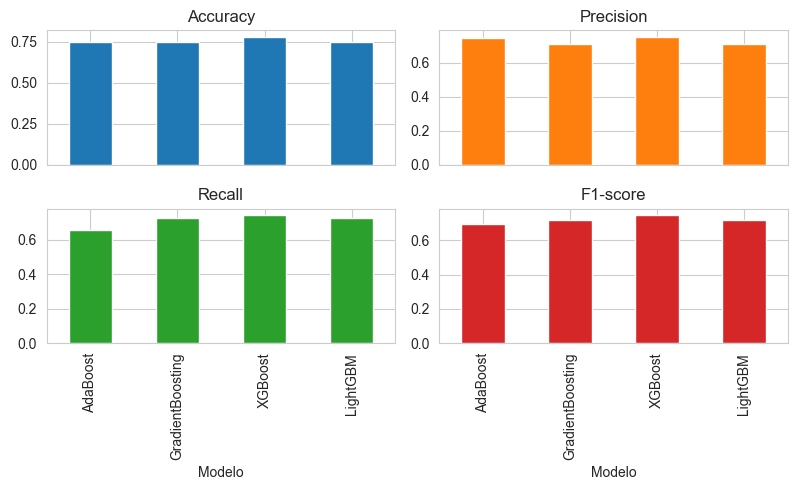

In [15]:
# --- Comparativa Diabetes (Clasificación) ---
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular métricas adicionales para cada modelo
precision_dia_ada = precision_score(y_dia_test, y_dia_pred_ada)
recall_dia_ada = recall_score(y_dia_test, y_dia_pred_ada)
f1_dia_ada = f1_score(y_dia_test, y_dia_pred_ada)

precision_dia = precision_score(y_dia_test, y_dia_pred)
recall_dia = recall_score(y_dia_test, y_dia_pred)
f1_dia = f1_score(y_dia_test, y_dia_pred)

precision_dia_xgb = precision_score(y_dia_test, y_dia_pred_xgb)
recall_dia_xgb = recall_score(y_dia_test, y_dia_pred_xgb)
f1_dia_xgb = f1_score(y_dia_test, y_dia_pred_xgb)

precision_dia_lgbm = precision_score(y_dia_test, y_dia_pred_lgbm)
recall_dia_lgbm = recall_score(y_dia_test, y_dia_pred_lgbm)
f1_dia_lgbm = f1_score(y_dia_test, y_dia_pred_lgbm)

resultados_dia = pd.DataFrame({
    'Modelo': ['AdaBoost', 'GradientBoosting', 'XGBoost', 'LightGBM'],
    'Accuracy': [acc_dia_ada, acc_dia, acc_dia_xgb, acc_dia_lgbm],
    'Precision': [precision_dia_ada, precision_dia, precision_dia_xgb, precision_dia_lgbm],
    'Recall': [recall_dia_ada, recall_dia, recall_dia_xgb, recall_dia_lgbm],
    'F1-score': [f1_dia_ada, f1_dia, f1_dia_xgb, f1_dia_lgbm]
})
display(resultados_dia)
resultados_dia.plot(x='Modelo', y=['Accuracy', 'Precision', 'Recall', 'F1-score'], kind='bar', subplots=True, layout=(2,2), legend=False, title=['Accuracy','Precision','Recall','F1-score'])
plt.tight_layout()
plt.show()

**Interpretación de las métricas para Diabetes (clasificación):**

- **Accuracy:** Proporción de aciertos totales. Todos los modelos tienen una accuracy similar (~0.75-0.78), pero XGBoost destaca ligeramente.
- **Precision:** Proporción de positivos predichos que realmente lo son. AdaBoost tiene la mayor precisión, pero a costa de un menor recall.
- **Recall:** Proporción de positivos reales que el modelo identifica correctamente. GradientBoosting, XGBoost y LightGBM tienen mejor recall que AdaBoost, lo que significa que detectan más casos positivos.
- **F1-score:** Media armónica entre precisión y recall. XGBoost obtiene el mejor F1-score, lo que indica un equilibrio óptimo entre precisión y recall.

**Conclusión:**
- **XGBoost** es el modelo más equilibrado y con mejor rendimiento global para este problema, ya que maximiza tanto la precisión como el recall, logrando el mayor F1-score y accuracy.
- **AdaBoost** es más conservador: predice menos positivos, pero cuando lo hace suele acertar (alta precisión, bajo recall).
- **GradientBoosting** y **LightGBM** logran un buen equilibrio, pero no superan a XGBoost.

**Recomendación:**
Para este dataset, XGBoost es la mejor opción si se busca un modelo robusto y equilibrado. Si se prefiere minimizar falsos positivos, AdaBoost puede ser útil, pero a costa de dejar escapar más casos positivos reales.

---

# 3️⃣ Titanic: Clasificación con Boosting
En esta sección aplicaremos todos los modelos de boosting al dataset Titanic.

In [16]:
# --- Preparar datos Titanic ---
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df_titanic = pd.read_csv(url_titanic)
# Limpieza básica
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)
df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1
df_titanic['IsAlone'] = (df_titanic['FamilySize'] == 1).astype(int)
df_titanic['Title'] = df_titanic['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
    'Capt': 'Rare', 'Sir': 'Rare'
}
df_titanic['Title'] = df_titanic['Title'].map(title_mapping)
# Codificar variables categóricas
from sklearn.preprocessing import LabelEncoder
for col in ['Sex', 'Embarked', 'Title']:
    le = LabelEncoder()
    df_titanic[col] = le.fit_transform(df_titanic[col].astype(str))
# Selección de variables
features_titanic = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X_tit = df_titanic[features_titanic]
y_tit = df_titanic['Survived']
from sklearn.preprocessing import StandardScaler
scaler_tit = StandardScaler()
X_tit_scaled = scaler_tit.fit_transform(X_tit)
X_tit_train, X_tit_test, y_tit_train, y_tit_test = train_test_split(X_tit_scaled, y_tit, test_size=0.3, random_state=42, stratify=y_tit)

C:\Users\Jaf\AppData\Local\Temp\ipykernel_20664\741399263.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
C:\Users\Jaf\AppData\Local\Temp\ipykernel_20664\741399263.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

### AdaBoost Classifier

In [17]:
ada_tit = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_tit.fit(X_tit_train, y_tit_train)
y_tit_pred_ada = ada_tit.predict(X_tit_test)
acc_tit_ada = accuracy_score(y_tit_test, y_tit_pred_ada)
print(f'AdaBoost - Accuracy: {acc_tit_ada:.2f}')
print(classification_report(y_tit_test, y_tit_pred_ada))

AdaBoost - Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       165
           1       0.75      0.77      0.76       103

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### Gradient Boosting Classifier

In [18]:
gbr_tit = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbr_tit.fit(X_tit_train, y_tit_train)
y_tit_pred = gbr_tit.predict(X_tit_test)
acc_tit = accuracy_score(y_tit_test, y_tit_pred)
print(f'Gradient Boosting - Accuracy: {acc_tit:.2f}')
print(classification_report(y_tit_test, y_tit_pred))

Gradient Boosting - Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       165
           1       0.81      0.62      0.70       103

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



### XGBoost Classifier

In [19]:
xgb_tit = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0)
xgb_tit.fit(X_tit_train, y_tit_train)
y_tit_pred_xgb = xgb_tit.predict(X_tit_test)
acc_tit_xgb = accuracy_score(y_tit_test, y_tit_pred_xgb)
print(f'XGBoost - Accuracy: {acc_tit_xgb:.2f}')
print(classification_report(y_tit_test, y_tit_pred_xgb))

XGBoost - Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       165
           1       0.76      0.66      0.70       103

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.79      0.78       268



### LightGBM Classifier

In [20]:
lgbm_tit = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgbm_tit.fit(X_tit_train, y_tit_train)
y_tit_pred_lgbm = lgbm_tit.predict(X_tit_test)
acc_tit_lgbm = accuracy_score(y_tit_test, y_tit_pred_lgbm)
print(f'LightGBM - Accuracy: {acc_tit_lgbm:.2f}')
print(classification_report(y_tit_test, y_tit_pred_lgbm))

[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 217
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

C:\Users\Jaf\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Modelo,Accuracy,Precision,Recall,F1-score
0,AdaBoost,0.813433,0.752381,0.766990,0.759615
1,GradientBoosting,0.798507,0.810127,0.621359,0.703297
2,XGBoost,0.787313,0.755556,0.660194,0.704663
3,LightGBM,0.787313,0.755556,0.660194,0.704663


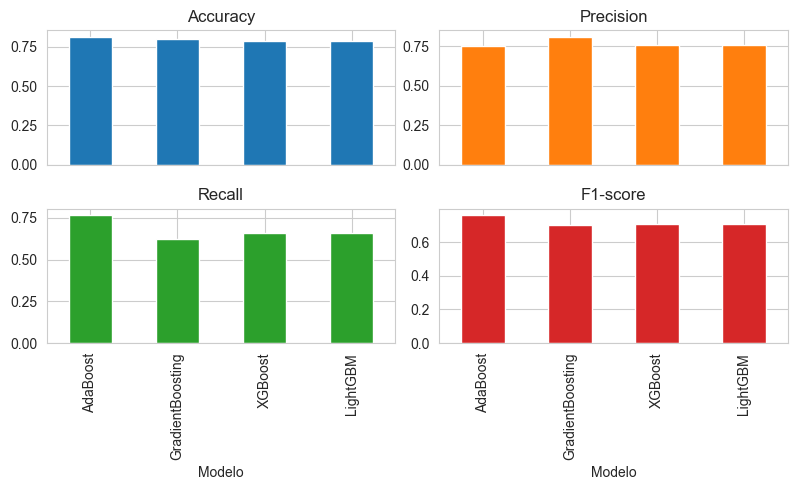

In [22]:
# --- Comparativa Titanic (Clasificación) ---
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular métricas adicionales para cada modelo
precision_tit_ada = precision_score(y_tit_test, y_tit_pred_ada)
recall_tit_ada = recall_score(y_tit_test, y_tit_pred_ada)
f1_tit_ada = f1_score(y_tit_test, y_tit_pred_ada)

precision_tit = precision_score(y_tit_test, y_tit_pred)
recall_tit = recall_score(y_tit_test, y_tit_pred)
f1_tit = f1_score(y_tit_test, y_tit_pred)

precision_tit_xgb = precision_score(y_tit_test, y_tit_pred_xgb)
recall_tit_xgb = recall_score(y_tit_test, y_tit_pred_xgb)
f1_tit_xgb = f1_score(y_tit_test, y_tit_pred_xgb)

precision_tit_lgbm = precision_score(y_tit_test, y_tit_pred_lgbm)
recall_tit_lgbm = recall_score(y_tit_test, y_tit_pred_lgbm)
f1_tit_lgbm = f1_score(y_tit_test, y_tit_pred_lgbm)

resultados_tit = pd.DataFrame({
    'Modelo': ['AdaBoost', 'GradientBoosting', 'XGBoost', 'LightGBM'],
    'Accuracy': [acc_tit_ada, acc_tit, acc_tit_xgb, acc_tit_lgbm],
    'Precision': [precision_tit_ada, precision_tit, precision_tit_xgb, precision_tit_lgbm],
    'Recall': [recall_tit_ada, recall_tit, recall_tit_xgb, recall_tit_lgbm],
    'F1-score': [f1_tit_ada, f1_tit, f1_tit_xgb, f1_tit_lgbm]
})
display(resultados_tit)
resultados_tit.plot(x='Modelo', y=['Accuracy', 'Precision', 'Recall', 'F1-score'], kind='bar', subplots=True, layout=(2,2), legend=False, title=['Accuracy','Precision','Recall','F1-score'])
plt.tight_layout()
plt.show()

**Interpretación de las métricas para Titanic (clasificación):**

- **Accuracy:** Proporción de aciertos totales. AdaBoost es el que obtiene la mayor accuracy (0.81), seguido de GradientBoosting (0.80) y XGBoost/LightGBM (0.79).
- **Precision:** Proporción de positivos predichos que realmente lo son. GradientBoosting destaca en precisión (0.81), lo que indica que cuando predice supervivientes, suele acertar más que el resto.
- **Recall:** Proporción de positivos reales que el modelo identifica correctamente. AdaBoost tiene el mejor recall (0.77), es decir, detecta más supervivientes reales.
- **F1-score:** Media armónica entre precisión y recall. AdaBoost logra el mejor F1-score (0.76), mostrando el mejor equilibrio entre ambas métricas.

**Conclusión:**
- **AdaBoost** es el modelo más equilibrado y con mejor rendimiento global para este problema, ya que maximiza tanto la capacidad de detectar supervivientes (recall) como la precisión y el F1-score.
- **GradientBoosting** es muy preciso, pero sacrifica recall, es decir, predice menos supervivientes pero con mayor certeza.
- **XGBoost** y **LightGBM** tienen un rendimiento similar, equilibrado pero ligeramente inferior a AdaBoost en este caso.

**Recomendación:**
Para este dataset, AdaBoost es la mejor opción si se busca un modelo equilibrado. Si se prefiere minimizar falsos positivos (predecir solo cuando se está muy seguro), GradientBoosting puede ser útil, aunque dejará escapar más supervivientes reales.

## 4️⃣ Análisis: ¿Cuándo usar cada modelo de boosting?
A continuación, se resumen las ventajas, desventajas y recomendaciones de uso para cada modelo de boosting probado:

- **AdaBoost**:
  - Ventajas: Simple, fácil de entender, funciona bien con datos limpios y sin mucho ruido.
  - Desventajas: Sensible a outliers y ruido, menos potente en datasets complejos.
  - Usar cuando: El dataset es pequeño, limpio y se busca interpretabilidad.

- **Gradient Boosting (GBM)**:
  - Ventajas: Muy flexible, buen rendimiento en la mayoría de los problemas, permite ajustar muchos hiperparámetros.
  - Desventajas: Más lento que XGBoost/LightGBM, sensible a overfitting si no se regula.
  - Usar cuando: Se requiere un modelo robusto y se puede invertir tiempo en ajustar hiperparámetros.

- **XGBoost**:
  - Ventajas: Muy rápido, regularización avanzada, manejo de valores nulos, excelente para competiciones y grandes volúmenes de datos.
  - Desventajas: Más complejo de ajustar, puede consumir más memoria.
  - Usar cuando: Se busca el mejor rendimiento posible y se dispone de recursos computacionales.

- **LightGBM**:
  - Ventajas: Extremadamente rápido, eficiente en memoria, ideal para datasets grandes y muchas variables.
  - Desventajas: Puede sobreajustar en datasets pequeños, menos interpretable.
  - Usar cuando: El dataset es muy grande o de alta dimensionalidad y se necesita velocidad.

**Sobre las métricas:**
- En problemas de regresión (como California Housing) es fundamental analizar tanto el **MSE** como el **RMSE** y el **R2**. El RMSE es especialmente útil porque se interpreta en las mismas unidades que la variable objetivo, facilitando la comprensión del error real de las predicciones.
- En problemas de clasificación (Diabetes, Titanic) la métrica principal utilizada aquí es la **Accuracy**, pero también es recomendable revisar otras métricas como precisión, recall y F1-score según el contexto del problema.

**Recomendación general:**
- Para empezar, Gradient Boosting suele ser una buena opción base.
- Si el dataset es grande o se busca máxima eficiencia, probar XGBoost o LightGBM.
- AdaBoost es útil para problemas sencillos o como modelo base para comparar.

**Recuerda:** Siempre valida los resultados con tus propios datos y ajusta los hiperparámetros según el problema concreto.